In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [5]:
file = files.upload()

Saving Pokemon Data.csv to Pokemon Data.csv


In [48]:
data = pd.read_csv('Pokemon Data.csv')
data.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [49]:
#Data cleaning
data.tail(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [8]:
data.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0


In [9]:
data.shape

(800, 12)

In [36]:
data['Type 2'].fillna(value = 'None', inplace = True)
data.isnull().sum()

/tmp/ipython-input-835473888.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Type 2'].fillna(value = 'None', inplace = True)


,0
#,0
Name,0
Type 1,0
Type 2,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0


<Axes: xlabel='Type 1'>

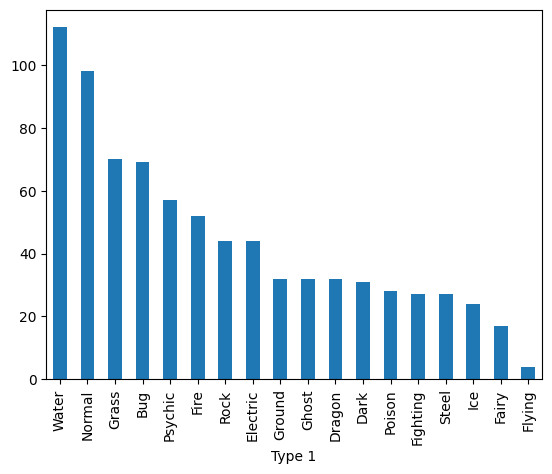

In [37]:
#Exploratory Data Analysis
data['Type 1'].value_counts().plot.bar()

<Axes: xlabel='Type 2'>

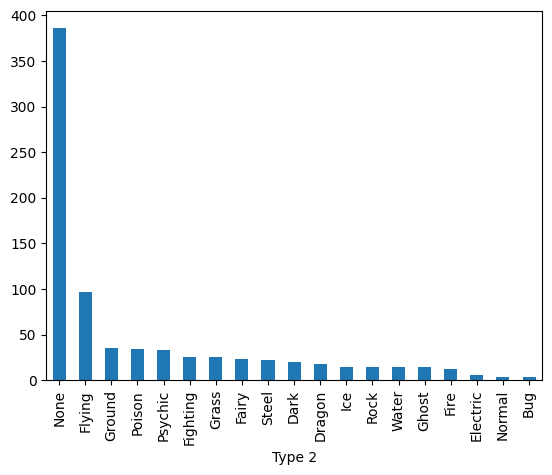

In [38]:
data['Type 2'].value_counts().plot.bar()

<Axes: xlabel='Legendary'>

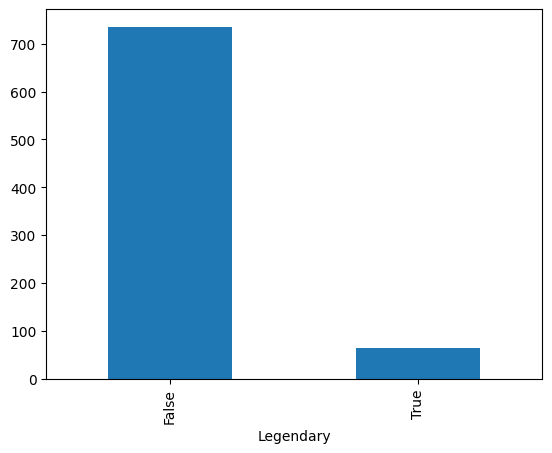

In [39]:
data['Legendary'].value_counts().plot.bar()

In [21]:
#Data preprocesing
#Handling categorical data
data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [23]:
data['Type 2'].unique()

array(['Poison', 'None', 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [55]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Legendary'] = lb.fit_transform(data['Legendary'])

In [56]:
data.head(10)

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Grass,Poison,80,82,83,100,100,80,1,0
3,3,Grass,Poison,80,100,123,122,120,80,1,0
4,4,Fire,NaN,39,52,43,60,50,65,1,0
5,5,Fire,NaN,58,64,58,80,65,80,1,0
6,6,Fire,Flying,78,84,78,109,85,100,1,0
7,6,Fire,Dragon,78,130,111,130,85,100,1,0
8,6,Fire,Flying,78,104,78,159,115,100,1,0
9,7,Water,NaN,44,48,65,50,64,43,1,0


In [58]:
data.drop('Name', inplace = True, axis = 1)

KeyError: "['Name'] not found in axis"

In [59]:
data.head()

,#,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Grass,Poison,45,49,49,65,65,45,1,0
1,2,Grass,Poison,60,62,63,80,80,60,1,0
2,3,Grass,Poison,80,82,83,100,100,80,1,0
3,3,Grass,Poison,80,100,123,122,120,80,1,0
4,4,Fire,NaN,39,52,43,60,50,65,1,0


In [60]:
data = pd.get_dummies(data)

In [61]:
#Train Test Split
from sklearn.model_selection import train_test_split
y = data.pop('Legendary')
x = data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [62]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [65]:
#Model efficiency
from sklearn.metrics import accuracy_score
y_pred1 = logreg.predict(x_test)
accuracy_score(y_test, y_pred1)

0.91875

In [66]:
from sklearn.neighbors import KNeighborsClassifier
error_rates = []
for a in range(1, 40):
  k = a
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)
  preds = knn.predict(x_test)
  #Error rates
  error_rates.append(np.mean(y_test - preds))

Text(0, 0.5, 'Error rates')

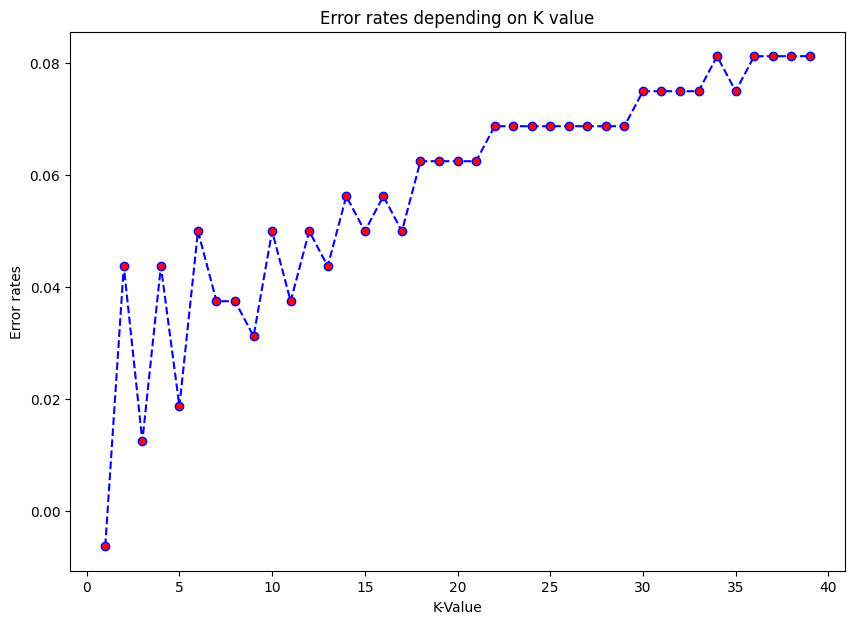

In [70]:
#Plotting
plt.figure(figsize = (10, 7))
plt.plot(range(1, 40), error_rates, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red')
plt.title('Error rates depending on K value')
plt.xlabel("K-Value")
plt.ylabel("Error rates")

In [73]:
knn_model = KNeighborsClassifier(n_neighbors = 8)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [74]:
y_pred2 = knn_model.predict(x_test)
accuracy_score(y_pred2, y_test)

0.925

In [75]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [77]:
y_pred3 = clf.predict(x_test)
accuracy_score(y_pred3, y_test)

0.9